## Application | Business Case

In this demonstration, **Supervised Machine Learning** is used to predict and analyze a student's marks. For this task, we begin our pursuit by approaching the problem using a technique called the "simple linear regression model". It is a statistical model commonly used to estimate the relationship between two quantitative variables; one dependent variable and one or more independent variables using a line. This algorithm is fast and efficient for a small and medium-sized database and is useful to quickly discover insights from labeled data.

Our two quantitative variables are:
1. the percentage of marks scored by each student on a particular subject.
2. the number of hours studied by each student on a particular subject.
The task is to predict the percentage of marks that a student is expected to score, based upon the number of hours they study. In order to implement the functions in this model, Python libraries will be used.

### Importing Libraries & Loading Data
Below, we will import the libraries involved. Please note that Scikit-Learn will be imported later on.

In [1]:
# Importing libraries.

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

The next step is to load the given data into the Python Interpreter to proceed with the training of the model. Pandas are used to load the CSV (comma-separated values) file and give a confirmation of sorts when the data is successfully loaded.

Note: I had saved the file into my system, in the same directory as this very Interpreter.

In [2]:
# Loading Data into Python Interpreter.

data = pd.read_csv("student_scores.csv")  
print("Data has been imported successfully into interpretor." )  

Data has been imported successfully into interpretor.


### Visualizing Raw Data & Gaining Insights
Information regarding the dataset can be seen by using the info() function.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


There are two columns, one named "Hours" and the other named "Scores". There are a total of 25 values in each column. Thus, it can be said that there are 25 elements in the data being fed to the machine learning model. The type of data (Dtype) in the former is float, while the type of data (Dtype) in the latter is an integer. For future purposes, both columns should have the same type of data.

In [4]:
data["Scores"] = data['Scores'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


Upon successful import and conversion of both columns' data types to be the same, the data can be previewed using the head() function.

In [5]:
# Preview Data.

print("Given below is the data imported from the CSV file.")
data.head()

Given below is the data imported from the CSV file.


,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


Notice how the head() function only previews the top five elements by default. This can be customized by simply adding the number of elements that are required to be seen between the parenthesis.

In [6]:
data.head(10)

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


Being a Data Scientist requires having a couple of functional skills, such as having a good sense of numbers. One should be able to analyze and translate what the numbers are saying. This requires a firm hold in statistics. Thankfully, the describe() function provides a set of important values for further statistical analysis. 

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the Data
The next phase is to enter the distribution scores and plot them according to the requirement. The data points are plotted on a 2-D graph to visualize the dataset and see if any relationship between the data can be identified. The plot is created using the following script:

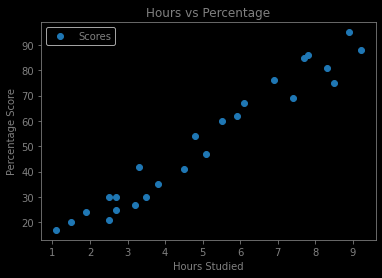

In [8]:
# Plotting the distribution of scores

plt.rcParams.update({
    "lines.color": "gray",
    "patch.edgecolor": "gray",
    "text.color": "gray",
    "axes.facecolor": "black",
    "axes.edgecolor": "gray",
    "axes.labelcolor": "gray",
    "xtick.color": "gray",
    "ytick.color": "gray",
    "grid.color": "gray",
    "figure.facecolor": "black",
    "figure.edgecolor": "gray",
    "savefig.facecolor": "gray",
    "savefig.edgecolor": "black"})

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, it is evident that there is a positive linear relationship between the two variables, i.e. number of hours studied and the percentage of scores are directly proportional.

### Prepare Data for Machine Learning Algorithm
A deluge of data is present in a host of different formats, structures, and sources. A crucial part of a Data Scientist's job is to prepare this data by cleaning, organizing, and optimizing for use by end-users. End-users include business stakeholders, analysts, and programmers. The "prepared" data is then used to interpret the results and relay information for the management to take better-informed decisions.    

In [9]:
# Data Cleaning.  
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [11]:
print("Just to be sure..")
data.head()

Just to be sure..


,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
# Divide the Data into Attributes & Labels

X = data.iloc[:, :-1].values    
Y = data.iloc[:, 1].values

Now that our attributes and labels are in place, the next step is to split this data into training and test sets. This is done by using Scikit-Learn's built-in train_test_split() method:

In [13]:
# Split Data into Training & Test Sets.

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Training the Machine Learning Algorithm
Upon splitting the data into training and testing sets, it is finally time to train the algorithm. As mentioned above, a simple linear regression model will be used.

In [14]:
# Train the Algorithm.

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_Train, Y_Train) 

print("Algorithm's training has been complete.")

Algorithm's training has been complete.


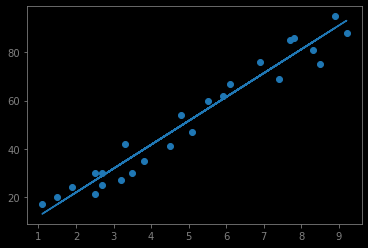

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making Predictions
Now that our algorithm has been trained, it is time to make predictions.

In [16]:
# Predict Scores for the Model.

print(X_Test) # Testing data - In Hours
Y_Pred = regressor.predict(X_Test)

print(X_Test)   
Y_Pred = regressor.predict(X_Test)  

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Compare Actual Data vs Predicted Data

data = pd.DataFrame({"Actual Scores": Y_Test, "Predicted Scores": Y_Pred})
data

,Actual Scores,Predicted Scores
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


In [18]:
pd.DataFrame(np.c_[X_Test,Y_Test,Y_Pred], columns=["Hours","Actual Scores","Predicted Scores"])

,Hours,Actual Scores,Predicted Scores
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


### Testing with Custom Data

In [19]:
# Test with Custom Data.

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = [[9.25]]
Predicted Score = 93.69173248737539


### Evalating the Machine Learning Algorithm
The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. In order to avoid any confusion, the mean square error will be taken into account. However, there are many other metrics that can be used.

In [20]:
# Evaluate Performance of Algorithm.

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_Test, Y_Pred)) 

Mean Absolute Error: 4.183859899002982
